<a href="https://colab.research.google.com/github/aksha1234/akshay-/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('project')
jovian.set_colab_id('1cBxOde2aPUpDsS5-omsn3_e5pF_F9OCD')

# project

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 4.4 MB/s 


In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="project")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


In [5]:
import pandas as pd

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_excel('/content/car_following (1).xlsx')

In [8]:
df

,Time,"v(t,i-1)","x(t,i-1)","x(t,i)"
0,0,0,5000,-102.0
1,1,0,5000,NaN
2,2,0,5000,NaN
3,3,0,5000,NaN
4,4,0,5000,NaN
...,...,...,...,...
496,496,0,8762,NaN
497,497,0,8762,NaN
498,498,0,8762,NaN
499,499,0,8762,NaN


In [9]:
df.columns=['time','v_(i-1)','x_(i-1)','x_i']

In [10]:
df

,time,v_(i-1),x_(i-1),x_i
0,0,0,5000,-102.0
1,1,0,5000,NaN
2,2,0,5000,NaN
3,3,0,5000,NaN
4,4,0,5000,NaN
...,...,...,...,...
496,496,0,8762,NaN
497,497,0,8762,NaN
498,498,0,8762,NaN
499,499,0,8762,NaN


In [16]:
df[['s_i','s_imin']]=0

In [17]:
df

,time,v_(i-1),x_(i-1),x_i,s_i,s_imin
0,0,0,5000,-102.0,0,0
1,1,0,5000,NaN,0,0
2,2,0,5000,NaN,0,0
3,3,0,5000,NaN,0,0
4,4,0,5000,NaN,0,0
...,...,...,...,...,...,...
496,496,0,8762,NaN,0,0
497,497,0,8762,NaN,0,0
498,498,0,8762,NaN,0,0
499,499,0,8762,NaN,0,0


In [58]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
a_higher=4
a_lower=-6
v_desired=30

In [38]:
df['s_imin']=0

In [39]:
df['s_i'][1]=df['x_(i-1)'][0]-df['x_i'][0]
df['s_imin'][1]=6*(df['x_i'][0]/4.47+1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
df['v_i']=0

In [45]:
for val in range(1,df.shape[0]):
  df['s_i'][val]=df['x_(i-1)'][val-1]-df['x_i'][val-1]
  df['s_imin'][val]=6*(df['x_i'][val-1]/4.47+1)
  if df['s_imin'][val]< df['s_i'][val]:
    df['v_i'][val]=max(0,df['v_i'][val-1]-a_lower*(1))
  else:
     df['v_i'][val]=min(v_desired,df['v_i'][val-1]+a_higher*(1))
  df['x_i'][val]=df['x_i'][val-1]+df['v_i'][val]*1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7

In [46]:
df

,time,v_(i-1),x_(i-1),x_i,s_i,s_imin,v_i
0,0,0,5000,-102.0,0.0,0,0
1,1,0,5000,-96.0,5102.0,-130,6
2,2,0,5000,-84.0,5096.0,-122,12
3,3,0,5000,-66.0,5084.0,-106,18
4,4,0,5000,-42.0,5066.0,-82,24
...,...,...,...,...,...,...,...
496,496,0,8762,16236.0,-7444.0,21759,30
497,497,0,8762,16266.0,-7474.0,21799,30
498,498,0,8762,16296.0,-7504.0,21839,30
499,499,0,8762,16326.0,-7534.0,21879,30


Text(0, 0.5, 'velcoity ')

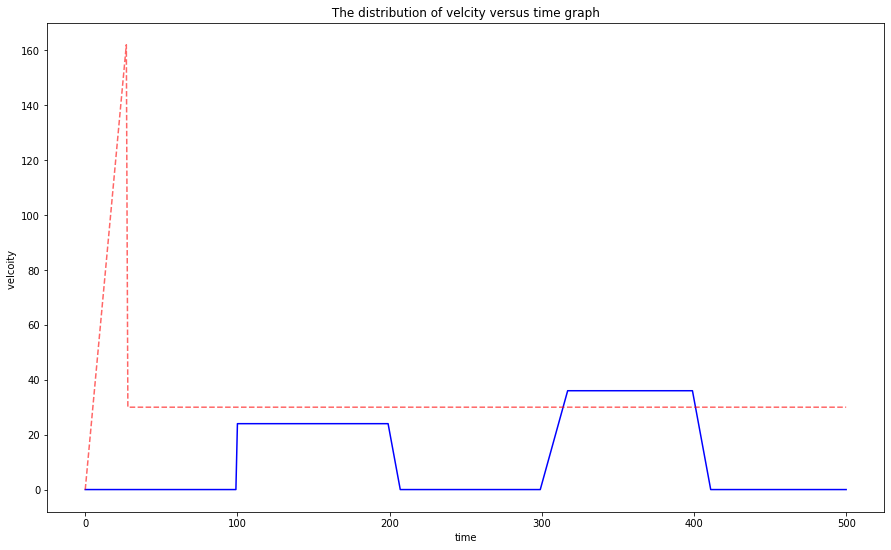

In [62]:
plt.figure(figsize=(15,9))
plt.title(' The distribution of velcity versus time graph ')
plt.plot(df['time'],df['v_(i-1)'],'b-')
plt.plot(df['time'],df['v_i'],'r--',alpha=0.6)
plt.xlabel('time')
plt.ylabel('velcoity ')


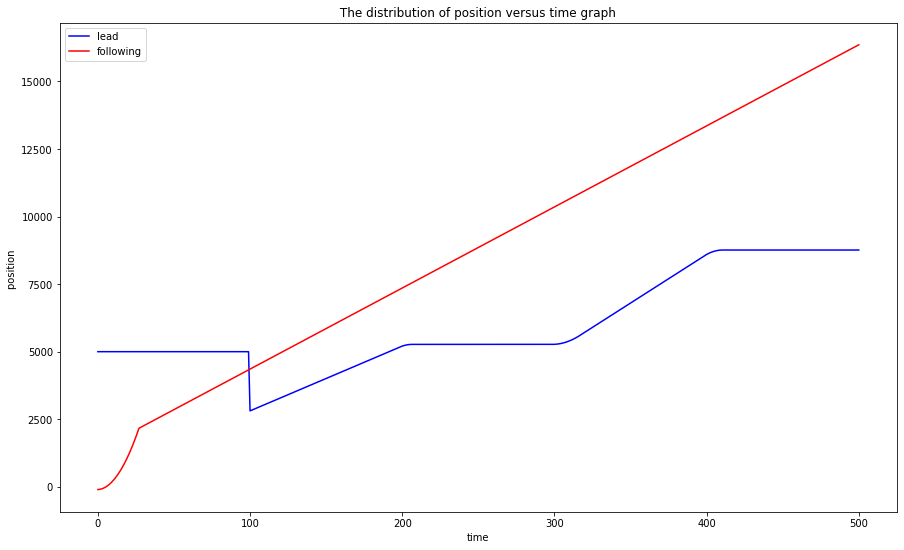

In [60]:
plt.figure(figsize=(15,9))
plt.title(' The distribution of position versus time graph ')
plt.plot(df['time'],df['x_(i-1)'],'b-')
plt.xlabel('time')
plt.ylabel('position ')
plt.legend(['lead','following'])

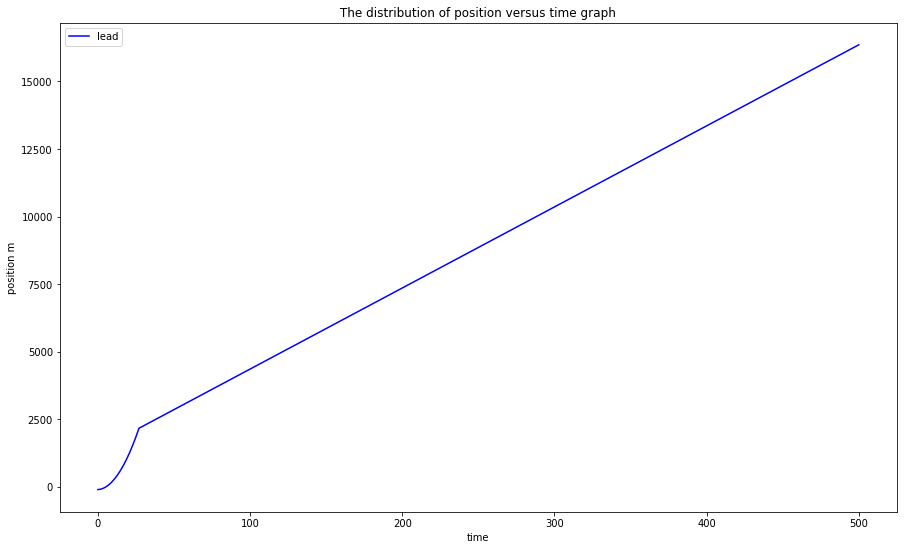

In [65]:
plt.figure(figsize=(15,9))
plt.title(' The distribution of position versus time graph ')
plt.plot(df['time'],df['x_i'],'b-')
plt.xlabel('time')
plt.ylabel('position m')
plt.legend(['lead','newell'])

In [63]:
df.to_csv('modified.csv')

In [64]:
jovian.commit(outputs='modified.csv')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
Committed successfully! https://jovian.ai/akkikadwe/project


'https://jovian.ai/akkikadwe/project'

In [66]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/akkikadwe/project


'https://jovian.ai/akkikadwe/project'